In [ ]:
!pip install transformers
!pip install accelerate
!pip install datasets
!pip install bertviz #Bert visualisation
!pip intsall umap-learn
!pip install seaborn --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

df = pd.read_csv("https://raw.githubusercontent.com/ngoniematt/Multiclass_sentiment_analysis/refs/heads/main/twitter_multi_class_sentiment.csv")


In [ ]:
df

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness
15996,i am now turning and i feel pathetic that i am...,0,sadness
15997,i feel strong and good overall,1,joy
15998,i feel like this was such a rude comment and i...,3,anger


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        16000 non-null  object
 1   label       16000 non-null  int64 
 2   label_name  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


In [ ]:
df.isnull().sum()

,0
text,0
label,0
label_name,0


In [ ]:
df.describe()

,label
count,16000.000000
mean,1.565937
std,1.501430
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,5.000000


In [ ]:
df['label'].value_counts()

,count
label,
1,5362
0,4666
3,2159
4,1937
2,1304
5,572


**DATASET ANALYSIS**


In [ ]:
import matplotlib.pyplot as plt



In [ ]:
lable_count = df['label_name'].value_counts(ascending = True)
lable_count

,count
label_name,
surprise,572
love,1304
fear,1937
anger,2159
sadness,4666
joy,5362


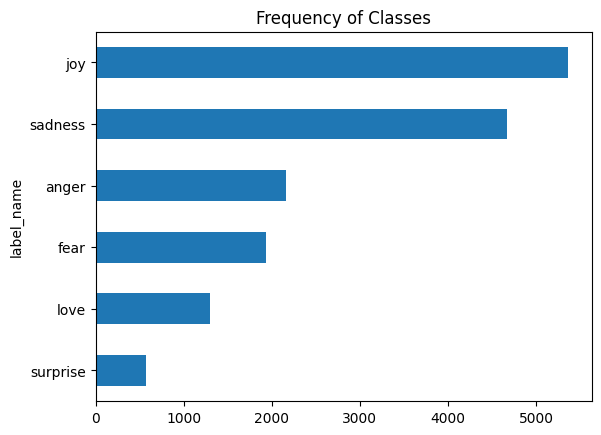

In [ ]:
lable_count.plot(kind = 'barh')
plt.title('Frequency of Classes')
plt.show()

In [ ]:
df["words per tweet"] = df['text'].str.split().apply(len)
df

,text,label,label_name,words per tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness,24
15996,i am now turning and i feel pathetic that i am...,0,sadness,20
15997,i feel strong and good overall,1,joy,6
15998,i feel like this was such a rude comment and i...,3,anger,14


<Axes: title={'center': 'words per tweet'}, xlabel='label_name'>

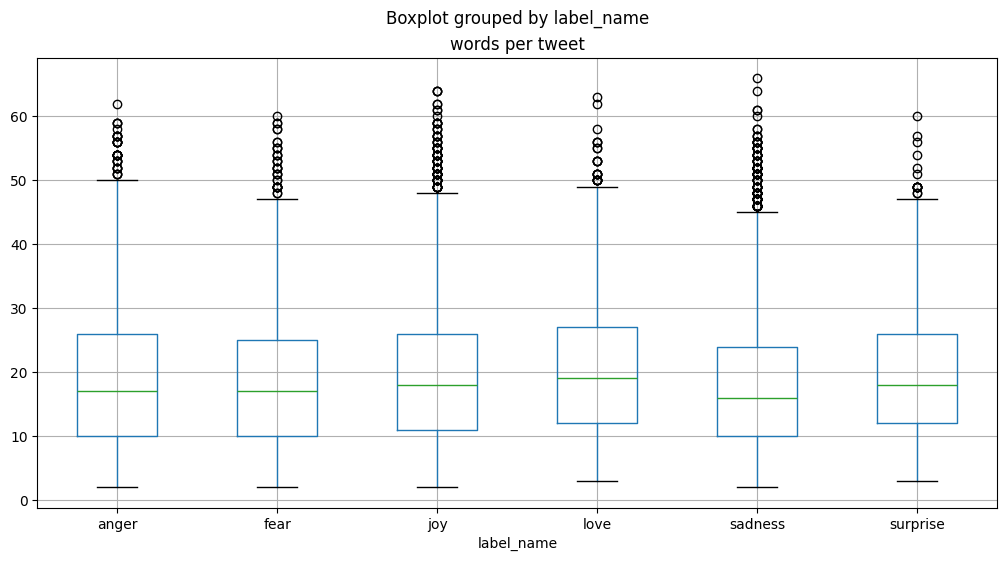

In [ ]:
df.boxplot('words per tweet', by = 'label_name', figsize = (12,6))

**HOW TOKENIZATION IS DONE**

In [ ]:
from transformers import AutoTokenizer
model_ckpt = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
text = "My name is Mathew and i love NLP"
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 2026, 2171, 2003, 25436, 1998, 1045, 2293, 17953, 2361, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
len(tokenizer.vocab)

30522

In [ ]:
len(tokenizer.vocab), tokenizer.vocab_size, tokenizer.model_max_length

(30522, 30522, 512)

**DATA LOADER AND TRAIN TEST SPLIT**

In [ ]:

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.3,stratify = df['label_name']) #Getting the train set which will be 70%
test, validation = train_test_split(test, test_size = 1/3,stratify = test['label_name']) #Getting the validationset from the test set
train.shape, test.shape, validation.shape

((11200, 4), (3200, 4), (1600, 4))

In [ ]:
from datasets import Dataset,DatasetDict

dataset = DatasetDict({
    'train': Dataset.from_pandas(train, preserve_index= False),
    'test': Dataset.from_pandas(test, preserve_index= False),
    'validation': Dataset.from_pandas(validation, preserve_index= False)
})

dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'words per tweet'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'words per tweet'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'words per tweet'],
        num_rows: 1600
    })
})

**TOKENIZATION OF THE EMOTION/SENTIMENT DATA**

In [ ]:
dataset [ 'train' ][ 0], dataset [ 'train' ][ 1]

({'text': 'i feel like they take time to care for their flowers and are wonderfully loyal to their hive',
  'label': 2,
  'label_name': 'love',
  'words per tweet': 18},
 {'text': 'i sink into the deep sofa and feel safe surrounded by everything i have known for so long walls choc a bloc with paintings hundreds of art books to dip in and out of',
  'label': 1,
  'label_name': 'joy',
  'words per tweet': 34})

In [ ]:
def tokenize(batch):
  return tokenizer(batch['text'], padding = True, truncation = True)


print(tokenize(dataset['train'][:2]))

{'input_ids': [[101, 1045, 2514, 2066, 2027, 2202, 2051, 2000, 2729, 2005, 2037, 4870, 1998, 2024, 6919, 2135, 8884, 2000, 2037, 26736, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 7752, 2046, 1996, 2784, 10682, 1998, 2514, 3647, 5129, 2011, 2673, 1045, 2031, 2124, 2005, 2061, 2146, 3681, 16480, 2278, 1037, 15984, 2007, 5265, 5606, 1997, 2396, 2808, 2000, 16510, 1999, 1998, 2041, 1997, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [ ]:
emotion_encoded= dataset.map(tokenize, batched = True, batch_size = None)

Map:   0%|          | 0/11200 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

In [ ]:
emotion_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'words per tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'words per tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'words per tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1600
    })
})

In [ ]:
#Label2id, id2Lable

label2id = {x['label_name']:x['label'] for x in dataset['train']}
id2label = {v:k for k,v in label2id.items()}

label2id, id2label

({'love': 2, 'joy': 1, 'sadness': 0, 'surprise': 5, 'fear': 4, 'anger': 3},
 {2: 'love', 1: 'joy', 0: 'sadness', 5: 'surprise', 4: 'fear', 3: 'anger'})

**MODEL BUILDING**

In [ ]:
from transformers import AutoModel
import torch



In [ ]:
model = AutoModel.from_pretrained(model_ckpt)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
model.config.architectures

['BertForMaskedLM']

**LOADING MODEL FOR CLASSIFICATION WITH CLASSIFICATION HEAD**

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoConfig

num_lables = len(label2id)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
config = AutoConfig.from_pretrained(model_ckpt,label2id = label2id, id2label = id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config = config).to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device

device(type='cuda')

In [ ]:
#check the model and compare with the previous
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
model.config

BertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "sadness",
    "1": "joy",
    "2": "love",
    "3": "anger",
    "4": "fear",
    "5": "surprise"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "anger": 3,
    "fear": 4,
    "joy": 1,
    "love": 2,
    "sadness": 0,
    "surprise": 5
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.48.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

**BUILDING TRAINING ARGUMENTS**

In [ ]:
from transformers import TrainingArguments


In [ ]:
batch_size = 64
training_dr = "bert-base-uncased-train_dr"

training_args = TrainingArguments( output_dir= training_dr,
                                  overwrite_output_dir= True,
                                  eval_strategy= 'epoch',
                                   num_train_epochs = 2,
                                   learning_rate = 2e-5,
                                   per_device_train_batch_size = batch_size,
                                   per_device_eval_batch_size = batch_size,
                                   weight_decay=0.01,
                                   disable_tqdm= False,
                                   report_to="none"  # This disables WandB and other integrations

)


**BUILDING COMPUTE METRICS**

In [ ]:
#Build compute metrics function
!pip install evaluate
import evaluate
import numpy as np
metric = evaluate.load('accuracy')
def compute_metrics_evaluate(eval_pred):
  predictions, labels = eval_pred
  predictions = np.argmax(predictions, axis = -1)
  return accuracy.compute(predictions = predictions, references = labels)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.7 MB/s eta 0:00:00


In [ ]:
#use default sklearn to build compute metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def compute_metrics_sklearn(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)

  f1 = f1_score(labels, preds, average = 'weighted')
  precision = precision_score(labels, preds, average = 'weighted')
  recall = recall_score(labels, preds, average = 'weighted')
  accuracy = accuracy_score(labels, preds)

  return {'f1': f1, 'precision': precision, 'recall': recall, 'accuracy': accuracy}

**BUILD TRAINER AND DO TRAINING**

In [ ]:
from transformers import Trainer
trainer = Trainer(
    model = model,
    args = training_args,
    train_dataset = emotion_encoded['train'],
    eval_dataset = emotion_encoded['validation'],
    tokenizer = tokenizer,
    compute_metrics = compute_metrics_sklearn
)

<ipython-input-40-c6439efc55ba>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,F1,Precision,Recall,Accuracy
1,No log,0.684837,0.769860,0.773991,0.798750,0.798750
2,No log,0.360086,0.885136,0.891701,0.889375,0.889375


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TrainOutput(global_step=350, training_loss=0.8118970598493304, metrics={'train_runtime': 311.3996, 'train_samples_per_second': 71.933, 'train_steps_per_second': 1.124, 'total_flos': 1001502421516800.0, 'train_loss': 0.8118970598493304, 'epoch': 2.0})

**MODEL EVALUATION**

In [ ]:
preds_output = trainer.predict(emotion_encoded['test'])
preds_output.metrics

{'test_loss': 0.3535604774951935,
 'test_f1': 0.8842454554665512,
 'test_precision': 0.8932813581476783,
 'test_recall': 0.89,
 'test_accuracy': 0.89,
 'test_runtime': 12.6194,
 'test_samples_per_second': 253.577,
 'test_steps_per_second': 3.962}

In [ ]:
y_pred = np.argmax(preds_output.predictions, axis = -1)
y_true = emotion_encoded['test']['label']

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, ))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       933
           1       0.91      0.93      0.92      1072
           2       0.79      0.78      0.79       261
           3       0.90      0.87      0.88       432
           4       0.81      0.91      0.86       387
           5       1.00      0.30      0.46       115

    accuracy                           0.89      3200
   macro avg       0.89      0.79      0.81      3200
weighted avg       0.89      0.89      0.88      3200



**PLOT CONFUSION MATRIX**

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[894,  12,   4,  17,   6,   0],
       [ 22, 992,  47,   6,   5,   0],
       [  6,  46, 203,   4,   2,   0],
       [ 34,   4,   1, 374,  19,   0],
       [ 19,   4,   1,  12, 351,   0],
       [  0,  32,   0,   1,  48,  34]])

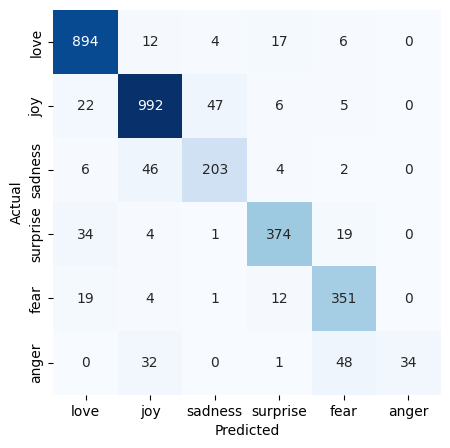

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot = True, cmap = 'Blues', xticklabels = label2id.keys(), yticklabels = label2id.keys(), fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**SAVE MODEL AND DO PREDICTION ON CUSTOM DATA**

In [ ]:
text = "I am super happy today. I got it done. Finally!!"

input_encoded = tokenizer(text, return_tensors = 'pt').to(device)
input_encoded

with torch.no_grad():
  output = model(**input_encoded)
output

logits = output.logits
logits

tensor([[-1.0472,  3.8898,  0.2217, -1.3700, -1.7681, -0.6422]],
       device='cuda:0')

In [ ]:
pred = torch.argmax(logits, dim = -1).item()
pred, id2label[pred]

(1, 'joy')

In [ ]:
#Lets put everything in a function
def get_predict(text):
  input_encoded = tokenizer(text, return_tensors = 'pt').to(device)
  with torch.no_grad():
    output = model(**input_encoded)
  logits = output.logits
  pred = torch.argmax(logits, dim = -1).item()
  return id2label[pred]

get_predict(text)

'joy'

In [ ]:
trainer.save_model("bert-base-uncased-matt")

In [ ]:
#use pipeline for prediction

from transformers import pipeline
classifier = pipeline('text-classification', model = 'bert-base-uncased-matt', tokenizer = model_ckpt)

classifier([text,'hello how are you?','i feel low today'])

Device set to use cuda:0


[{'label': 'joy', 'score': 0.9504374861717224},
 {'label': 'joy', 'score': 0.7682586312294006},
 {'label': 'sadness', 'score': 0.9351524114608765}]

In [ ]:
from google.colab import files
files.download('/content/bert-base-uncased-matt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import streamlit as st